# Drone Detection Using YOLOv8: A Comprehensive Dataset and Model Approach

<br>

<img src="https://images.pexels.com/photos/1852984/pexels-photo-1852984.jpeg" height=550 width=1000 alt="https://www.pexels.com/"/>

<small>Picture Source: <a href="https://www.pexels.com/tr-tr/@sulimansallehi/">Suliman Sallehi</a></small>

<br>

## Abstract
Unmanned aerial vehicles (UAVs), commonly known as drones, have become increasingly prevalent in various domains, including surveillance, photography, and delivery services. However, the rapid proliferation of drones raises concerns regarding security and privacy threats. To address these concerns, effective drone detection systems are crucial for identifying and tracking drones in real-time. In this research, we present a comprehensive dataset and propose a state-of-the-art drone detection model using the YOLOv8 architecture.

## Introduction
The widespread adoption of drones has led to an urgent need for reliable drone detection systems to ensure the safety and security of public spaces. Drone detection poses unique challenges due to the small size, fast movement, and diverse appearance of drones, making traditional object detection methods insufficient. Therefore, there is a growing demand for advanced detection models that can accurately identify drones in complex environments.
YOLO (You Only Look Once) is an object detection algorithm that was introduced in 2015 by **Joseph Redmon** et al. It revolutionized the field of computer vision by providing a real-time object detection solution with impressive accuracy.


## Dataset
To facilitate the development and evaluation of drone detection models, we introduce a novel and comprehensive dataset specifically curated for training and testing drone detection algorithms. The dataset, sourced from the publicly available [YOLO Drone Detection Dataset](https://www.kaggle.com/datasets/muki2003/yolo-drone-detection-dataset) on Kaggle, comprises a diverse set of annotated images captured in various environmental conditions and camera perspectives. The dataset includes instances of drones along with other common objects to enable robust detection and classification.

## Methodology
In this study, we employ the YOLOv8 architecture, a popular and highly efficient object detection framework, for drone detection. YOLOv8 stands for "You Only Look Once" version 7, which utilizes a single neural network to simultaneously predict bounding boxes and class probabilities for multiple objects in an image. This architecture offers real-time performance, making it ideal for drone detection applications.

## Experimental Setup
To train and evaluate our drone detection model, we utilize the Colab platform, a cloud-based environment that provides access to powerful computing resources and deep learning libraries. Leveraging Colab's GPU acceleration capabilities, we train the YOLOv8 model using our curated dataset and fine-tune its parameters to optimize detection accuracy and efficiency.

## YOLO


*   **Single Pass Detection**: YOLO takes a different approach compared to traditional object detection methods that use region proposal techniques. Instead of dividing the image into regions and examining each region separately, YOLO performs detection in a single pass. It divides the input image into a grid and predicts bounding boxes and class probabilities for each grid cell.


*   **Grid-based Prediction**: YOLO divides the input image into a fixed-size grid, typically, say, 7x7 or 13x13. Each grid cell is responsible for predicting objects that fall within it. For each grid cell, YOLO predicts multiple bounding boxes (each associated with a confidence score) and class probabilities.

*   **Anchor Boxes**: To handle objects of different sizes and aspect ratios, YOLO uses anchor boxes. These anchor boxes are pre-defined boxes of different shapes and sizes. Each anchor box is associated with a specific grid cell. The network predicts offsets and dimensions for anchor boxes relative to the grid cell, along with the confidence scores and class probabilities.

*   **Training**: YOLO is trained using a combination of labeled bounding box annotations and classification labels. The training process involves optimizing the network to minimize the localization loss (related to the accuracy of bounding box predictions) and the classification loss (related to the accuracy of class predictions).

*   **Speed and Accuracy Trade-off**: YOLO achieves real-time object detection by sacrificing some localization accuracy compared to slower methods like Faster R-CNN. However, it still achieves competitive accuracy while providing significantly faster inference speeds, making it well-suited for real-time applications.

<br>

Since its introduction, YOLO has undergone several improvements and variations. Different versions such as YOLOv2, YOLOv3, and YOLOv4 have been developed, each introducing enhancements in terms of accuracy, speed, and additional features.

It's important to note that this is a high-level overview of YOLO, and the algorithm has many technical details and variations. For a more in-depth understanding, it's recommended to refer to the original YOLO papers and related resources.


## Keywords

*   Drone detection
*   YOLOv8
*   Object detection
*   Deep learning
*   Surveillance
*   Security

<br>

Make sure your runtime is **GPU** (_not_ CPU or TPU). And if it is an option, make sure you are using _Python 3_. You can select these settings by going to `Runtime -> Change runtime type -> Select the above mentioned settings and then press SAVE`.


## Importing Libraries

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 7.2 MB/s eta 0:00:00


In [5]:
import os
from pathlib import Path
import pandas as pd

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image

from google.colab import files
from google.colab import drive

import warnings
warnings.filterwarnings("ignore")

In [3]:
from ultralytics import YOLO, checks
import torch
checks()

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


## Data Preprocessing

In [ ]:
%cd /content/

/content


In [ ]:
files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip -q /content/archive.zip

In [ ]:
# !rm -rf /content/archive.zip

In [ ]:
#@markdown ---
#@markdown ### Enter image paths:
train_images_dir = "/content/drone_dataset/train/images" #@param {type:"string"}
val_images_dir = "/content/drone_dataset/valid/images" #@param {type:"string"}

train_image_count = len([f for f in os.listdir(train_images_dir) if f.endswith(".jpg")])
val_image_count = len([f for f in os.listdir(val_images_dir) if f.endswith(".jpg")])

print(f"Number of images in train folder: {train_image_count}")
print(f"Number of images in val folder: {val_image_count}")
#@markdown ---

Number of images in train folder: 1012
Number of images in val folder: 347


In [ ]:
#@markdown ---
#@markdown ### Enter label paths:
train_labels_dir = "/content/drone_dataset/train/labels" #@param {type:"string"}
val_labels_dir = "/content/drone_dataset/valid/labels" #@param {type:"string"}

train_txt_count = len([f for f in os.listdir(train_labels_dir) if f.endswith(".txt")])
val_txt_count = len([f for f in os.listdir(val_labels_dir) if f.endswith(".txt")])

print(f"Number of TXT files in train labels folder: {train_txt_count}")
print(f"Number of TXT files in val labels folder: {val_txt_count}")
#@markdown ---

Number of TXT files in train labels folder: 1012
Number of TXT files in val labels folder: 348


## Training

YOLOv8 GitHub: [ultralytics](https://github.com/ultralytics/ultralytics)

In [ ]:
torch.__version__

'2.0.1+cu118'

Before training, you neet change `coco.yaml` and define your number of class, class names and train-val paths like that:

```
train: ../drone_dataset/train
val: ../drone_dataset/valid

# number of classes
nc: 1

# class names
names: ['drone']
```

In [ ]:
yaml_content = f'''
train: ../drone_dataset/train
val: ../drone_dataset/valid

# number of classes
nc: 1

# class names
names: ['drone']
    '''

with Path('coco.yaml').open('w') as f:
    f.write(yaml_content)

*   `!yolo train`: This is the command to execute the yolo script for training the YOLOv8 model.

*  `data=/content/coco.yaml`: This parameter specifies the path to the YAML file containing the dataset configuration. In this case, **the *coco.yaml* file is used, which provides information about the dataset, including the classes and paths to the training and validation data.**

*  `imgsz=640`: This parameter sets the input image size for the model. The YOLOv8 model requires square input images, and here the dimensions are set to 640x640 pixels.

*  `epochs=32`: This parameter defines the number of epochs, which represents the number of times the entire training dataset will be passed through the model during training. In this case, the model will be trained for **32 epochs**.

*  `model = YOLO("yolov8x.pt")`: This parameter specifies the initial weights of the model. The *yolov8x.pt* file contains the pre-trained weights for the *YOLOv8* model, which will be used as the starting point for training.

In [ ]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 281MB/s]


In [14]:
results = model.train(
        batch=16,
        data="coco.yaml",
        epochs=32,
        imgsz=640,
    )

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=coco.yaml, epochs=32, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

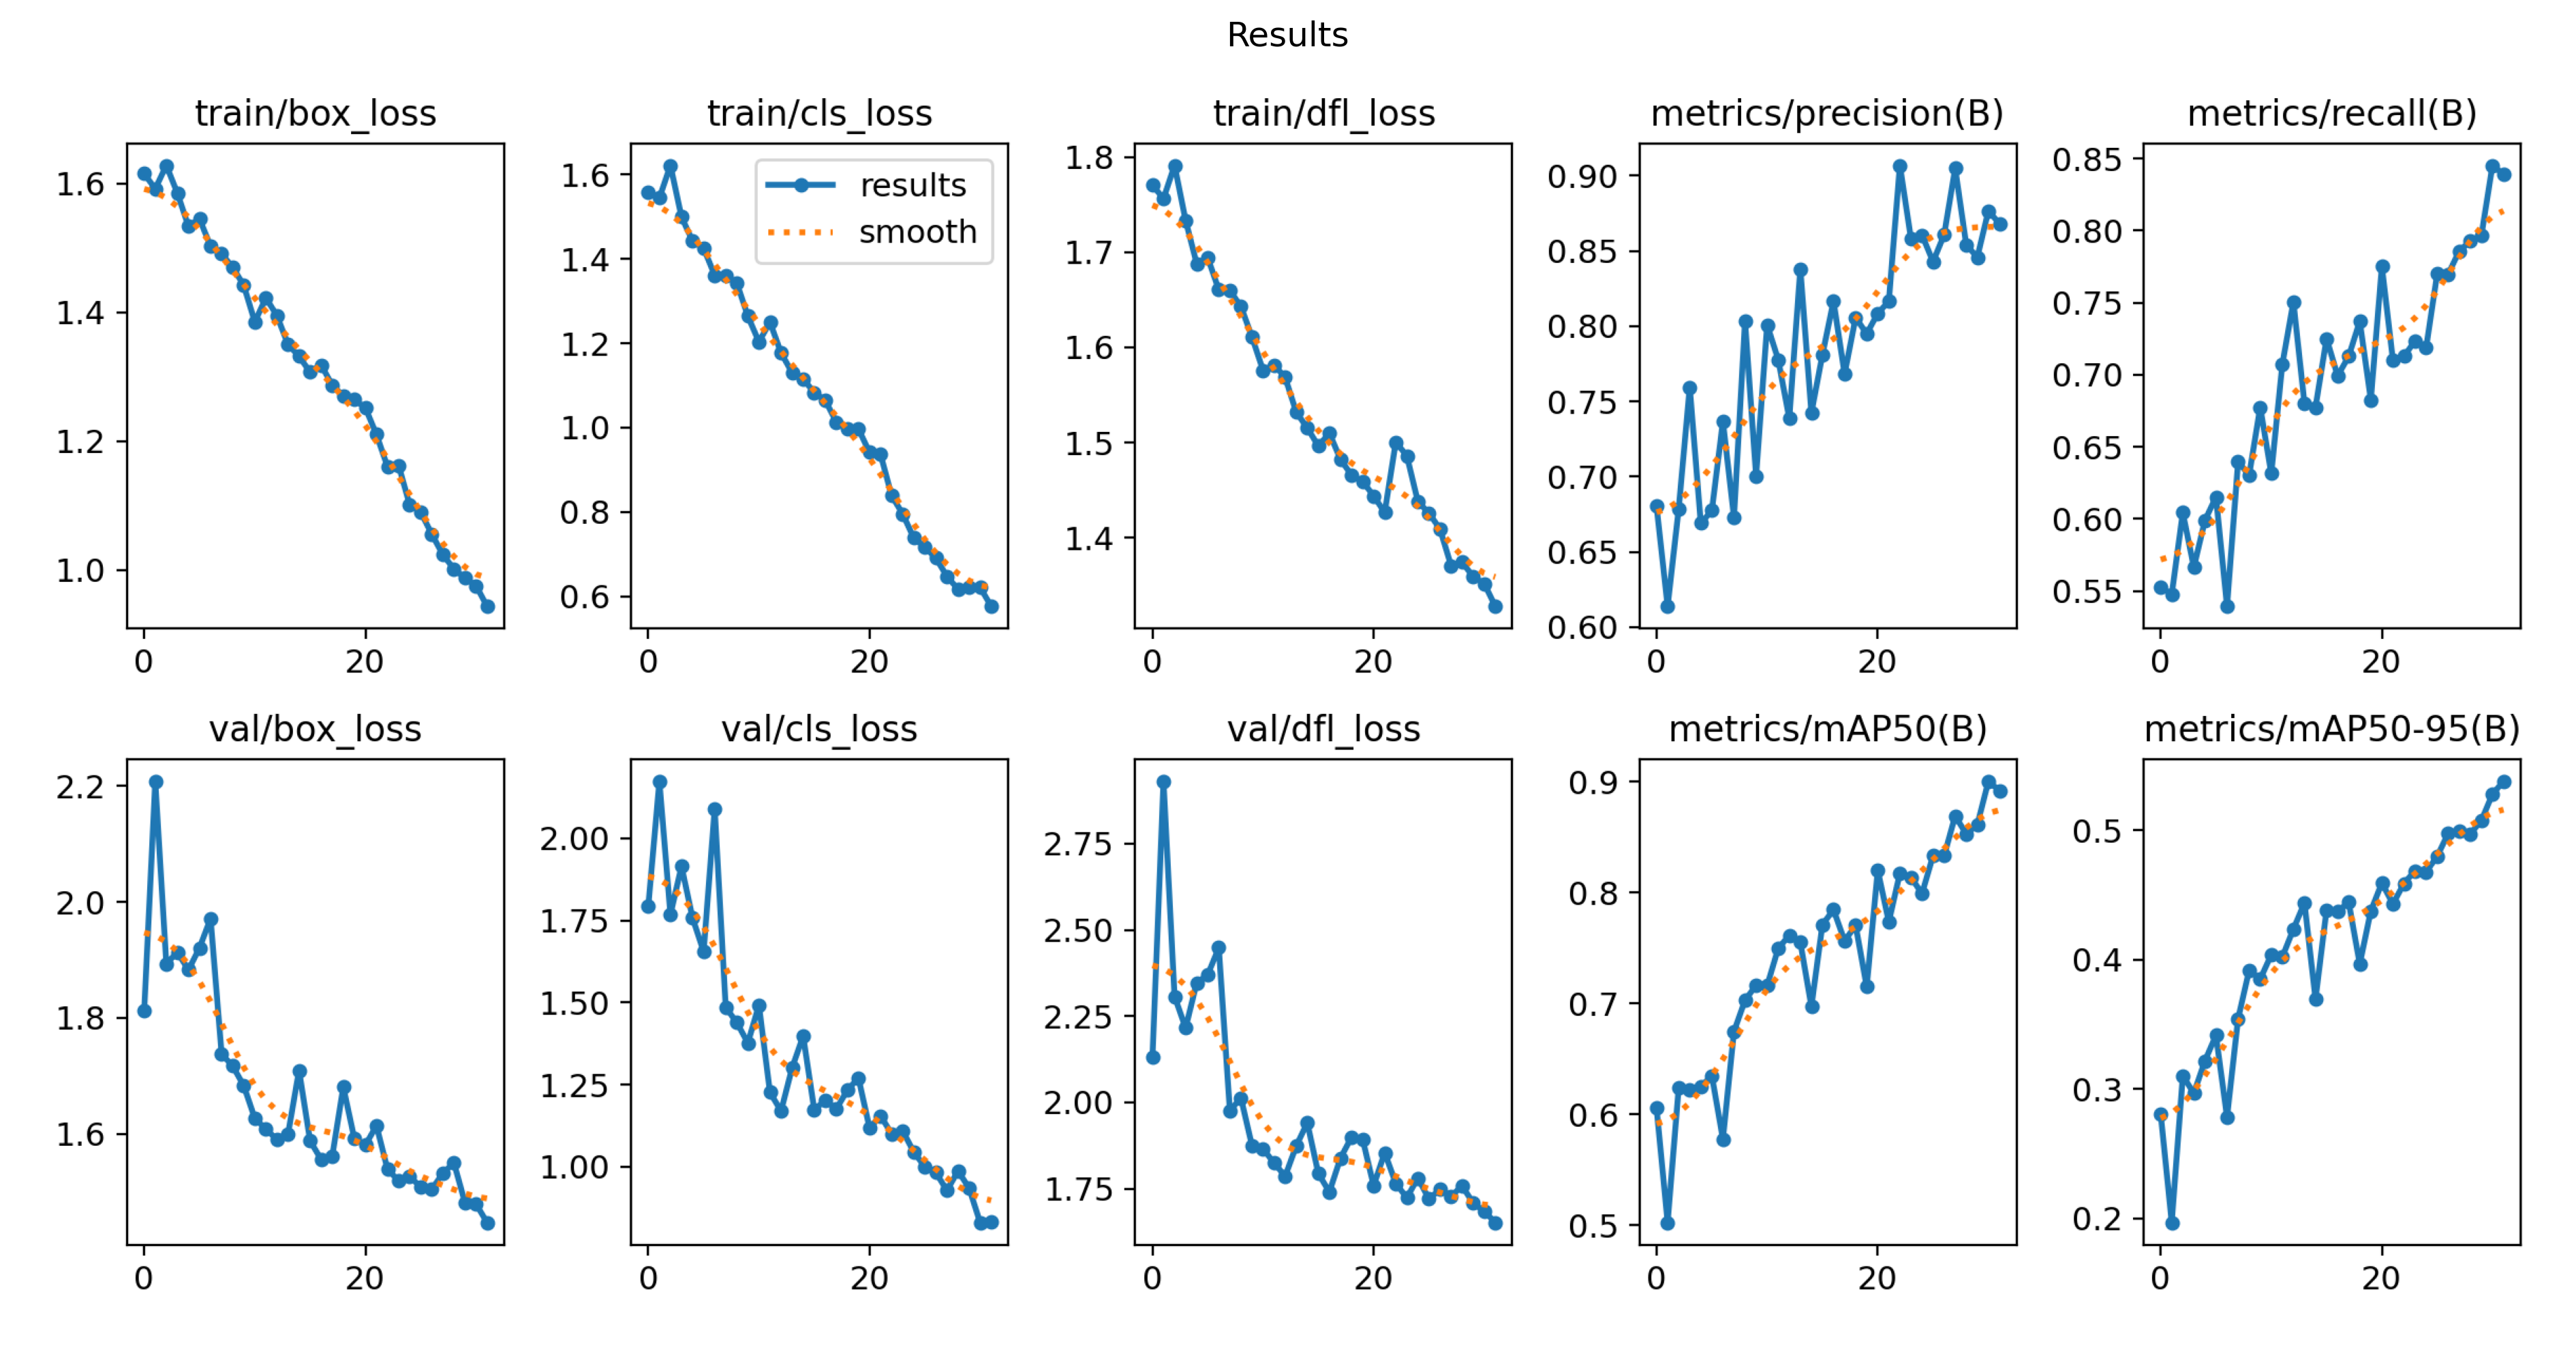

In [16]:
image = mpimg.imread('/content/runs/detect/train2/results.png')
plt.figure(figsize=(16, 9), dpi=300)
plt.title('Results')
plt.imshow(image)
plt.axis('off')
plt.show()

To calculate *mAP @ 0.5*, the model's predicted bounding boxes are compared to the ground truth bounding boxes for various objects in the dataset. The average precision (AP) is computed for each class at an IoU threshold of 0.5, and then the mean of these average precision scores is calculated across all classes. *mAP @ 0.5* provides an overall measure of the model's detection performance, indicating how well it can identify objects with a reasonable overlap threshold.

## Tracking Drone with YOLOv8

Object tracking is a task that involves identifying the location and class of objects, then assigning a unique ID to that detection in video streams.

Video source: [@ninosouza](https://www.pexels.com/@ninosouza/)

Video link: [pexels](https://www.pexels.com/video/an-airborne-drone-machine-8459631/)

In [6]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")
result = model.track(source="/content/pexels-joseph-redfield-8459631(1080p).mp4", conf=0.3, iou=0.5, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/552) /content/pexels-joseph-redfield-8459631(1080p).mp4: 384x640 1 drone, 104.7ms
video 1/1 (2/552) /content/pexels-joseph-redfield-8459631(1080p).mp4: 384x640 1 drone, 44.5ms
video 1/1 (3/552) /content/pexels-joseph-redfield-8459631(1080p).mp4: 384x640 1 drone, 44.7ms
video 1/1 (4/552) /content/pexels-joseph-redfield-8459631(1080p).mp4: 384x640 1 drone, 43.5ms
video 1/

## Save the Weights and Configuration File

In [ ]:
# model.export(format='onnx')

In [15]:
files.download('/content/coco.yaml')
files.download('/content/runs/detect/train2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
!rm -rf /content/runs/detect/train2/weights

In [17]:
!zip -r '/content/results.zip' '/content/runs/detect/train2/'

  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/R_curve.png (deflated 17%)
  adding: content/runs/detect/train2/P_curve.png (deflated 18%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/train2/val_batch2_labels.jpg (deflated 13%)
  adding: content/runs/detect/train2/train_batch1409.jpg (deflated 21%)
  adding: content/runs/detect/train2/train_batch2.jpg (deflated 15%)
  adding: content/runs/detect/train2/train_batch1410.jpg (deflated 20%)
  adding: content/runs/detect/train2/train_batch1.jpg (deflated 10%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 12%)
  adding: content/runs/detect/train2/events.out.tfevents.1690192204.26ceb98ea218.236.1 (deflated 72%)
  adding: content/runs/detect/train2/PR_curve.png (deflated 21%)
  adding: content/runs/detect/train2/args.yaml (deflated 51%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 15%)
  adding: content/

In [18]:
files.download('/content/results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Results and Discussion

We present comprehensive results of our drone detection model's performance on both the training and testing datasets. The evaluation metrics include precision, recall, and F1-score, which are standard measures to assess the model's detection accuracy. Additionally, we analyze the model's performance across various environmental conditions and discuss its strengths and limitations.

## Conclusion
Our research addresses the critical need for reliable drone detection systems by proposing a comprehensive dataset and a state-of-the-art detection model using the YOLOv8 architecture. The availability of our curated dataset and the promising performance of our model offer valuable contributions to the field of drone detection. The outcomes of this study can pave the way for enhanced security measures and privacy protection in areas where drones pose potential risks.

## Contact Me
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [13]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-07-24 11:13:17
